In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

In [4]:
#Data is from Metabase -> Appointments, filtered at LabID = 3, Completed At previous 14 days, not including today.

csv_address = 'C:\\Users\\RichardKim\\Downloads\\past14days.csv'

In [5]:
df = pd.read_csv(csv_address)

df.rename(columns = dict(zip(df.columns, map(lambda x: x.replace(' ', '_'), df.columns))), inplace = True)
for column_name in ['Accessioned_At', 'Completed_At', 'In_Testing_At', 'Pulled_At', 'Released_At', 'Resulted_At', 'Updated_At']:
    df[column_name] = pd.to_datetime(df[column_name])

In [6]:
df.columns

Index(['Accessioned_At', 'Accessioned_Lab_ID', 'Completed_At',
       'Dead_Kits_Count', 'ID', 'In_Testing_At', 'Patient_ID', 'Provider_ID',
       'Pulled_At', 'Pulled_By_ID', 'Reference_Number',
       'Reference_Number_Prefix', 'Released_At', 'Result', 'Resulted_At',
       'Search_Document', 'Status', 'Updated_At', 'Result_Note',
       'Screening_Data', 'Accessioning_Package_ID', 'Alinity_Weak_Positive'],
      dtype='object')

In [7]:
len(df)

106189

In [89]:
# What is the definition of 'Turnaround Time'???

In [7]:
df = df.loc[df['Released_At'].notna()]

In [8]:
df['Completed_Date'] = df['Completed_At'].dt.date
df['Turnaround_Time'] = df['Released_At'] - df['Accessioned_At']
df['Turnaround_Time_Hrs'] = df['Turnaround_Time'].apply(pd.Timedelta.total_seconds)/3600

In [9]:
df.head()

,Accessioned_At,Accessioned_Lab_ID,Completed_At,Dead_Kits_Count,ID,In_Testing_At,Patient_ID,Provider_ID,Pulled_At,Pulled_By_ID,...,Search_Document,Status,Updated_At,Result_Note,Screening_Data,Accessioning_Package_ID,Alinity_Weak_Positive,Completed_Date,Turnaround_Time,Turnaround_Time_Hrs
0,2021-11-18 00:35:32.844154-08:00,3,2021-11-17 14:41:57.664217-08:00,0,49260629,2021-11-18 02:29:04.914702-08:00,20428924,154.0,NaT,NaN,...,146181358,RELEASED,2021-11-18 06:26:06.933376-08:00,NaN,"{""symptoms"": {""none"": false, ""aches"": true, ""c...",165236.0,False,2021-11-17,0 days 05:50:30.898367,5.841916
1,2021-11-26 13:22:49.070833-08:00,3,2021-11-24 08:45:00.553991-08:00,0,49499243,2021-11-26 15:08:23.093377-08:00,20929628,154.0,NaT,NaN,...,135612987,RELEASED,2021-11-26 22:13:54.898069-08:00,NaN,"{""symptoms"": {""none"": true, ""aches"": false, ""c...",169625.0,False,2021-11-24,0 days 04:25:49.171399,4.430325
2,2021-11-26 16:49:40.990001-08:00,3,2021-11-26 07:54:56.634755-08:00,0,49541182,2021-11-26 17:53:19.953025-08:00,17269821,154.0,NaT,NaN,...,139143257,RELEASED,2021-11-27 07:13:14.009915-08:00,NaN,"{""symptoms"": {""none"": true, ""aches"": false, ""c...",169799.0,False,2021-11-26,0 days 04:05:53.088618,4.098080
3,2021-11-26 11:04:06.122037-08:00,3,2021-11-24 10:43:10.167476-08:00,0,49521329,2021-11-26 11:50:13.014184-08:00,10724245,154.0,NaT,NaN,...,149225524,RELEASED,2021-11-27 01:03:30.085611-08:00,NaN,"{""symptoms"": {""none"": null, ""aches"": null, ""co...",169547.0,True,2021-11-24,0 days 06:46:41.357676,6.778155
4,2021-11-26 13:32:11.139292-08:00,3,2021-11-23 13:14:10.491275-08:00,0,49492548,2021-11-26 14:39:19.071823-08:00,12141797,154.0,NaT,NaN,...,133585545,RELEASED,2021-11-27 01:52:27.068630-08:00,NaN,"{""symptoms"": {""none"": null, ""aches"": null, ""co...",169612.0,False,2021-11-23,0 days 04:33:22.897012,4.556360


In [10]:
def tat10(x): return x.quantile(.1)
def tat25(x): return x.quantile(.25)
def tat50(x): return x.quantile(.5)
def tat75(x): return x.quantile(.75)
def tat90(x): return x.quantile(.9)
def tat95(x): return x.quantile(.95)

In [11]:
df1 = df.groupby('Completed_Date').agg({'Turnaround_Time_Hrs': [tat10, tat25, tat50, tat75, tat90, tat95]})
df1.columns = ['tat'+str(x) for x in [10, 25, 50, 75, 90, 95]]
df1 = df1.reset_index()
df1['Date_Display'] = df1['Completed_Date'].apply(pd.to_datetime).apply(lambda x: x.strftime("%b %d"))

In [12]:
df1

,Completed_Date,tat10,tat25,tat50,tat75,tat90,tat95,Date_Display
0,2021-11-13,2.989010,3.265128,3.728048,4.256307,4.758004,5.240360,Nov 13
1,2021-11-14,2.916110,3.277479,3.742119,4.320917,4.940110,5.679307,Nov 14
2,2021-11-15,3.152235,3.582102,4.337516,5.423617,6.478660,7.245528,Nov 15
3,2021-11-16,3.146067,3.528687,4.232963,5.198143,5.852235,6.376377,Nov 16
4,2021-11-17,3.123350,3.601019,4.333240,5.374832,6.284136,6.869595,Nov 17
5,2021-11-18,3.112020,3.576016,4.278688,5.321306,6.296904,6.819118,Nov 18
6,2021-11-19,3.186806,3.616187,4.235955,5.154404,6.634156,7.674968,Nov 19
7,2021-11-20,3.034640,3.413112,3.924810,4.688463,5.587000,6.625157,Nov 20
8,2021-11-21,2.822155,3.165819,3.665727,4.641715,5.894912,6.977891,Nov 21
9,2021-11-22,3.216792,3.684361,4.647867,5.937049,6.844804,8.458794,Nov 22


In [13]:
df2 = df.loc[df['Completed_Date'] >= date(2021, 11, 18)]
df2['CtoR'] = df2['Released_At'] - df2['Completed_At']
Median_CtoR = pd.Timedelta.total_seconds(df2['CtoR'].median())/3600
Median_AtoR = df2['Turnaround_Time_Hrs'].median()

<ipython-input-13-9390d2be2018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CtoR'] = df2['Released_At'] - df2['Completed_At']


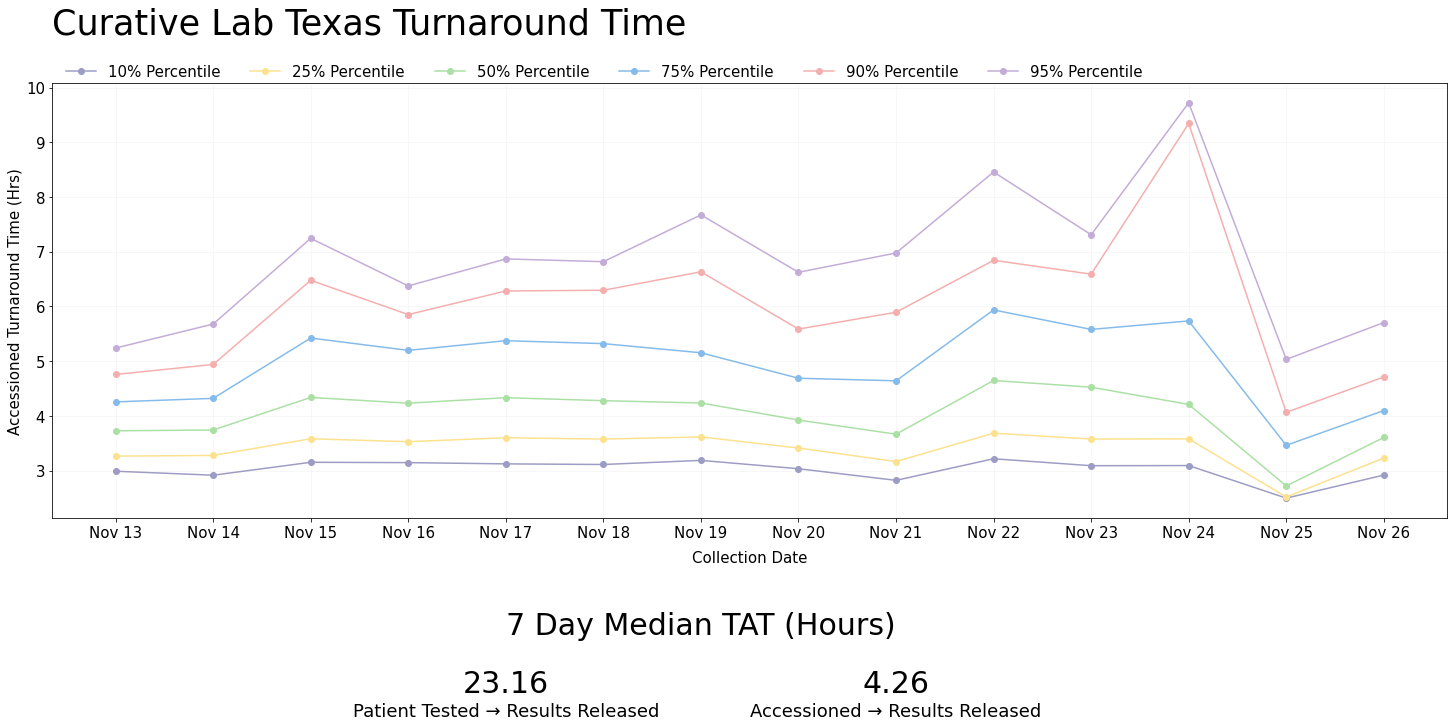

In [25]:
fig, ax1 = plt.subplots(figsize = (25, 8), facecolor = 'white')

ax1.plot(df1.Date_Display, df1.tat10, color = '#9c9cc5', marker = 'o', label = '10% Percentile')
ax1.plot(df1.Date_Display, df1.tat25, color = '#fce18e', marker = 'o', label = '25% Percentile')
ax1.plot(df1.Date_Display, df1.tat50, color = '#abe0a4', marker = 'o', label = '50% Percentile')
ax1.plot(df1.Date_Display, df1.tat75, color = '#85bbeb', marker = 'o', label = '75% Percentile')
ax1.plot(df1.Date_Display, df1.tat90, color = '#f5aeae', marker = 'o', label = '90% Percentile')
ax1.plot(df1.Date_Display, df1.tat95, color = '#c3acd7', marker = 'o', label = '95% Percentile')

plt.title(f'Curative Lab Texas Turnaround Time', fontsize = 35, y = 1.1, loc = 'left')
ax1.set_xlabel('Collection Date', fontsize = 15, labelpad = 10)
ax1.set_ylabel('Accessioned Turnaround Time (Hrs)', fontsize = 15)

ax1.set_xmargin(0.05)
ax1.tick_params(axis = 'both', labelsize = 15)

ax1.grid(visible = True, axis = 'both', color = 'whitesmoke')

ax1.legend(loc = 2, frameon = False, ncol = 6, bbox_to_anchor = (0, 1.075), fontsize = 15)

y_offset = 0
###TAT HOURS
plt.text(6, y_offset, '7 Day Median TAT (Hours)', fontsize = 30, horizontalalignment = 'center')
plt.text(4, -1.05 + y_offset, f'{Median_CtoR:.2f}', fontsize = 30, horizontalalignment = 'center')
plt.text(8, -1.05 + y_offset, f'{Median_AtoR:.2f}', fontsize = 30, horizontalalignment = 'center')
plt.text(4, -1.5 + y_offset, 'Patient Tested → Results Released', fontsize = 18, horizontalalignment = 'center')
plt.text(8, -1.5 + y_offset, 'Accessioned → Results Released', fontsize = 18, horizontalalignment = 'center')

plt.show()